<a href="https://colab.research.google.com/github/amita-kapoor/Designing-Models-for-Responsible-AI/blob/main/Chapter13/ModelCalibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_classification
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, brier_score_loss
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
X, y = make_classification(n_samples=10000, n_features=10, n_redundant=0, random_state=37, weights=[0.5])

In [ ]:
Xs = pd.DataFrame(X)
ys = pd.DataFrame(y, columns=['label'])

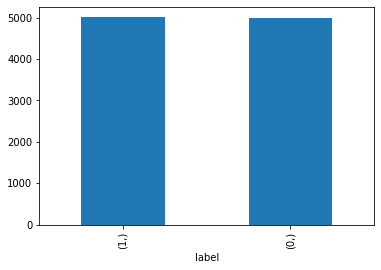

In [ ]:
#plotting bar chart
ys.value_counts().plot(kind='bar')

In [ ]:
X_train_raw, X_test, y_train_raw, y_test = train_test_split(Xs, ys, test_size=0.20, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_raw, y_train_raw, test_size=0.20, shuffle=False)

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train.values.ravel())
y_pred_uncal = clf.predict_proba(X_test)[:, 1]

In [ ]:
roc_auc_score(y_test, y_pred_uncal)

0.9185432154389126

In [ ]:
brier_score_loss(y_test, y_pred_uncal)

0.10919273032433353

In [ ]:
calibrated_clf = CalibratedClassifierCV(clf, cv=3, method='isotonic')
calibrated_clf.fit(X_val, y_val.values.ravel())
y_pred_cal = calibrated_clf.predict_proba(X_test)[:, 1]

In [ ]:
print(f'ROC Score {roc_auc_score(y_test, y_pred_cal):.2f} \nBrier Score {brier_score_loss(y_test, y_pred_cal):.2f}')

ROC Score 0.92 
Brier Score 0.11


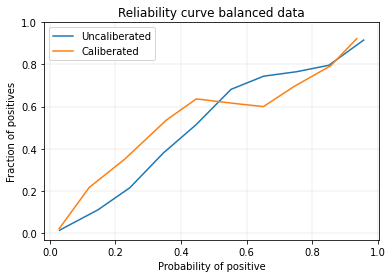

In [ ]:
plt.rcParams.update({'font.size': 10})
frac_of_positives_uncal, pred_prob_uncal = calibration_curve(y_test, y_pred_uncal, n_bins=10)
sns.lineplot(x=pred_prob_uncal, y=frac_of_positives_uncal)
frac_of_positives_cal, pred_prob_cal = calibration_curve(y_test, y_pred_cal, n_bins=10)
sns.lineplot(x=pred_prob_cal, y=frac_of_positives_cal)
plt.grid(linestyle='-', linewidth=0.2)
plt.title("Reliability curve balanced data")
xlabel = plt.xlabel("Probability of positive")
ylabel = plt.ylabel("Fraction of positives")
plt.legend(labels = ['Uncaliberated', 'Caliberated'])
ticks = [0, 0.2, 0.4, 0.6, 0.8, 1]
xticks = plt.xticks(ticks)
yticks = plt.yticks(ticks)

In [ ]:
X, y = make_classification(n_samples=10000, n_features=10, n_redundant=0, random_state=37, weights=[0.95])
Xs = pd.DataFrame(X) 
ys = pd.DataFrame(y, columns=['label'])

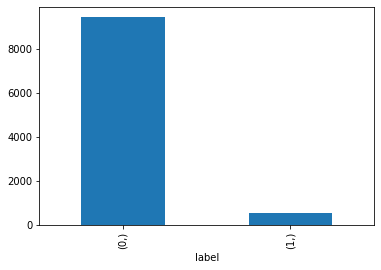

In [ ]:
#plotting bar chart 
ys.value_counts().plot(kind='bar')

In [ ]:
X_train_raw, X_test, y_train_raw, y_test = train_test_split(Xs, ys, test_size=0.20, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_raw, y_train_raw, test_size=0.20, shuffle=False)

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train.values.ravel())
y_pred_uncal = clf.predict_proba(X_test)[:, 1]
print(f'ROC Score {roc_auc_score(y_test, y_pred_uncal):.2f} \nBrier Score {brier_score_loss(y_test, y_pred_uncal):.2f}')

ROC Score 0.88 
Brier Score 0.04


In [ ]:
calibrated_clf = CalibratedClassifierCV(clf,cv=3, method='isotonic')
calibrated_clf.fit(X_val, y_val.values.ravel())
y_pred_cal = calibrated_clf.predict_proba(X_test)[:, 1]
print(f'ROC Score {roc_auc_score(y_test, y_pred_uncal):.2f} \nBrier Score {brier_score_loss(y_test, y_pred_uncal):.2f}')

ROC Score 0.88 
Brier Score 0.04


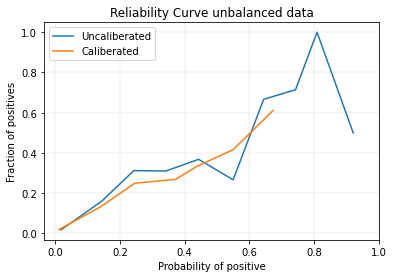

In [ ]:
plt.rcParams.update({'font.size': 10})
frac_of_positives_uncal, pred_prob_uncal = calibration_curve(y_test, y_pred_uncal, n_bins=10)
sns.lineplot(x=pred_prob_uncal, y=frac_of_positives_uncal)
frac_of_positives_cal, pred_prob_cal = calibration_curve(y_test, y_pred_cal, n_bins=10)
sns.lineplot(x=pred_prob_cal, y=frac_of_positives_cal)
plt.grid(linestyle='-', linewidth=0.2)
plt.title("Reliability Curve unbalanced data")
xlabel = plt.xlabel("Probability of positive")
ylabel = plt.ylabel("Fraction of positives")
plt.legend(labels = ['Uncaliberated', 'Caliberated'])
ticks = [0, 0.2, 0.4, 0.6, 0.8, 1]
xticks = plt.xticks(ticks)
yticks = plt.yticks(ticks)